# CHURN PREDICTION
## *Using Artificial Neural Network*

**Problem Statement:** A bank gathered their's customers' data and labeled them as churned customers if they left the bank within 6 months of the point of data collection. The aim is to develop a model capable of predicting customer churn based on the provided features in the training set.

<img src="ann.jpg">

In [1]:
# Import key liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import liberaries for preprocessing $ model assessment
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Import liberaries to build the Artificial Neural Network
import keras
from keras.models import Sequential
from keras.layers import Dense

# do not print warnings
import warnings; warnings.simplefilter('ignore')

Using TensorFlow backend.


In [2]:
# Import data file
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
# Check the first few rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Split the features and target
X = data.drop(['RowNumber','CustomerId','Surname', 'Exited'], axis=1)
y = data['Exited']

In [5]:
# Encode categorical features (Geography & Gender)
le_1 = LabelEncoder()
le_2 = LabelEncoder()

X['Geography'] = le_1.fit_transform(X['Geography'])
X['Gender'] = le_2.fit_transform(X['Gender'])

ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()
X = X[:, 1:]

In [6]:
# Split data for model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 0)

In [7]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Building the Artificial Neural Network 
- Two hidden layers, 6 Neurons each , and a ReLU activation
- One output node with a segmoid activation function to provide churn propability

In [8]:
clf = Sequential([
    # Adding the input layer and the first hidden layer
    Dense(units=6, input_dim = 11, activation = 'relu'),
    
    # Adding the second hidden layer
    Dense(units=6, activation = 'relu'),
    
    # Adding the output layer
    Dense(units=1, activation = 'sigmoid')
])

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Compiling the ANN
clf.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
# training the model
clf.fit(X_train, y_train,  batch_size=10, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
8000/8000 [==============================] - 1s 148us/step - loss: 0.5547 - accuracy: 0.7470
Epoch 2/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.4362 - accuracy: 0.8075
Epoch 3/100
8000/8000 [==============================] - 1s 117us/step - loss: 0.4106 - accuracy: 0.81670s
Epoch 4/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.3962 - accuracy: 0.8239
Epoch 5/100
8000/8000 [==============================] - 1s 118us/step - loss: 0.3789 - accuracy: 0.8376
Epoch 6/100
8000/8000 [==============================] - 1s 116us/step - loss: 0.3664 - accuracy: 0.8470
Epoch 7/100
8000/8000 [==============================] - 1s 120us/step - loss: 0.3579 - accuracy: 0.8521
Epoch 8/100
8000/8000 [==============================] - 1s 115us/step - loss: 0.3523 - accuracy: 0.8550
Epoch 9/100
8000/8000 [==============================] - 1s 104us/step - loss: 0.3484 - accuracy: 0.8579
Epoch

In [11]:
# Useing the model to generate predictions
y_pred = clf.predict(X_test)
y_pred = (y_pred> 0.5)

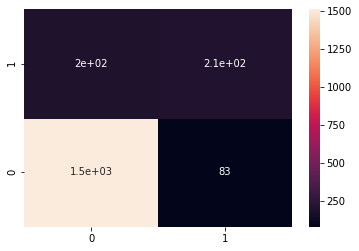

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [12]:
# Assess the model performance
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)
plt.ylim(0,2)
plt.show()

print(classification_report(y_test, y_pred))

**Comments:** The Naive Bayes model succeeded to classify the reviews with an accuracy of 86%